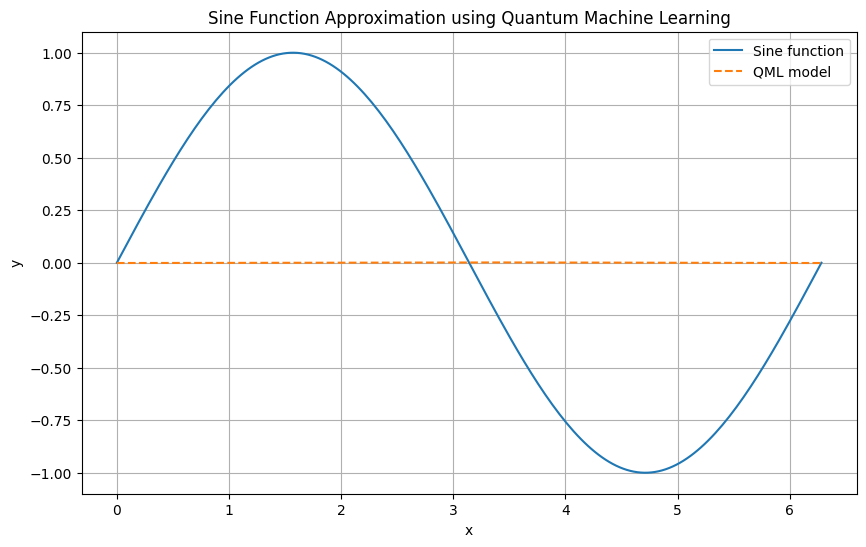

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the QML model with increased complexity
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def qml_model(phi, weights):
    qml.RX(phi, wires=0)
    qml.RY(weights[0], wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[1, 2])
    qml.RY(weights[2], wires=2)
    return qml.expval(qml.PauliZ(0))

# Define the sine function
def sine(x):
    return np.sin(x)

# Define the training data with more points
x_train = np.linspace(0, 2 * np.pi, 200)
y_train = np.sin(x_train)

# Define the loss function
def loss(weights):
    predictions = np.array([qml_model(x, weights) for x in x_train])
    return np.mean((predictions - y_train) ** 2)

# Train the QML model with adjusted hyperparameters
opt = qml.AdamOptimizer(0.01)
weights = np.random.normal(0, 0.1, (3,), requires_grad=True)

for epoch in range(200):  # Increased number of epochs
    weights, _ = opt.step_and_cost(lambda w: loss(w), weights)

# Evaluate the trained QML model
x_eval = np.linspace(0, 2 * np.pi, 200)
y_eval = np.array([qml_model(x, weights) for x in x_eval])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label="Sine function")
plt.plot(x_eval, y_eval, label="QML model", linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Sine Function Approximation using Quantum Machine Learning")
plt.grid(True)
plt.show()
